# A ProGAN Model Summary

ProGAN - Генеративная модель, разработанная в начале 2018 года Tero Karras, Timo Aila, Samuli Laine...   
В основу ProGAN легли три фундаментальных отличия, которые мы рассмотрим ближе чуть позже:
1. Прогрессивно увеличивающееся разрешение модели
2. Подсчет стандартного отклонения на Mini-бэтчах
3. Последовательное \"включение\" новых слоев

## 1. Прогрессивно увеличивающееся разрешение модели
Методика заключается в последовательном увеличении разрешения изображения и модели по мере обучения.   
Обучение и Генератора и Дискриминатора начинается с изображений размера 4х4 пикселя. По мере достижения необходимого критерия, разрешение кратно увеличивают до 8х8, затем 16х16 и т. д. до размера в 1024 пикселя

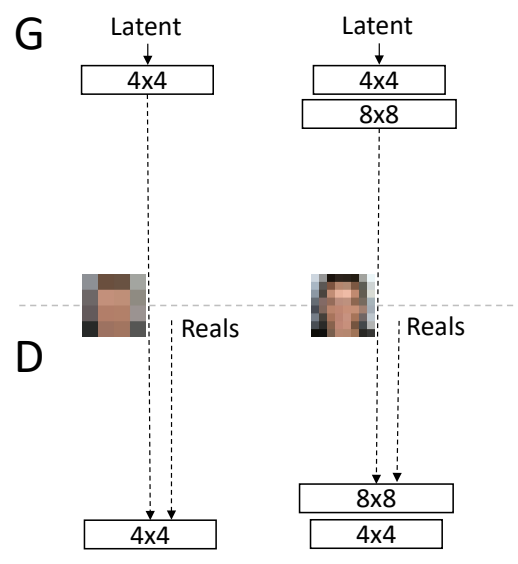

## 2. Подсчет стандартного отклонения на всех Мини-бэтчах
Каждый раз, когда мы обучаем модель на определенном бэтче картинок, мы просчитываем стандартное отклонение всех пикселей всех каналов всех изображений бэтча, и посчитанный скаляр добавляем к выводу генератора в дискриминатор, таким образом заставляя модель генерировать более различные между собой изображения.

## 3. Последовательное \"включение\" новых слоев
Идея заключается в том, что при обучении последнего (на определенный момент обучения последний слой генератора и первый слой дискриминатора будут слои, работающие с текущим разрешением изображений в цикле обучения) слоя генератора мы используем параметр `Alpha`, и вывод с предпоследнего слоя проходит через два пути:
- Вывод предпоследнего слоя идет напрямую на вывод модели, умножаясь на `Alpha`
- Вывод предпоследнего слоя проходит через последний слой, умножаясь на `1 - Alpha`  
Таким образом, уменьшая Alpha по мере обучения текущего разрешения модели, мы можем плавно \"Встраивать\" последний слой модели, где с каждой новой итерацией обучения, роль последнего слоя будет линейно возрастать

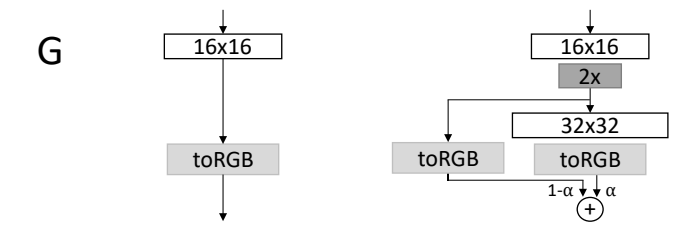

Для Генератора верно все то же самое, только зеркально для первого слоя.